# La classe Grammar
La classe Grammar permet de calculer les principales caractéristiques d'une grammaire algébrique (context-free grammar)
- variables et règles ε-productives et productives, variables accessibles
- ensembles «Premiers» et «Suivants»
- table LL(1)  et parser LL(1)
- automate LR(0) et parsers LR(0), SLR(1), LALR(1)

Cet outil vous permettra de vérifier la validité de vos propres calculs

### Comment créer une grammaire ?
Une grammaire est une instance de la classe Grammar. Elle est créée très simplement en à partir de sa définition
(cf détails un peu plus bas)

Voici un premier exemple de création de grammaire et d'affichage de certaines de ses propriétés :


In [1]:
from grammar.grammar import Grammar

g = Grammar.from_string('S -> ( S ) S | a')

print(g)
print('variables productives : ', g.productive.vars)
print('ensembles «suivants» : ', g.follow)

Grammar(
 terminals : ( ) a
 variables : S
 axiom : S
 rules : ['S → ( S ) S', 'S → a']
)
variables productives :  {'S'}
ensembles «suivants» :  {'S': {'#', ')'}}


---
## La syntaxe de définition des grammaires
La syntaxe de définition d'une grammaire se veut la plus proche possible de l'écriture habituelle.

Une grammaire est décrite par un texte, souvent de plusieurs lignes.
- Chaque ligne comporte une et une seule «flèche vers la droite» ( `->` ou `→`)
    - à gauche de la flèche : un et un seul symbole, qui désigne une variable
    - à droite de la flèche : une ou plusieurs parties droites de règles, séparées par le caractère |
- tous les symboles situés à gauche d'une flèche sont considérés comme des **variables**
- tous les autres symboles apparaissant dans les règles constituent l'**alphabet terminal**
- la première variable utilisée est considérée comme l'**axiome**

### Exemple
```
REL -> PRIM S
S -> ⋈ REL | 
PRIM -> id | σ COND ( REL )
COND -> ( id = id L )
L -> id = id L |
        
```
### Symbole (variable ou lettre terminale)

Un symbole est une séquence de 1 ou plusieurs caractères. Sont **interdits** : les espaces ` `, les caractères `|` `#` `→` `ε` et la sous-chaîne `->`

Pour les **variables**, il est conseillé de n'utiliser que des symboles qui pourraient être un identificateur python.

Deux symboles successifs devront donc être **séparés** par au moins un espace
### Le mot vide
**Le mot vide ne s'écrit pas**. 
Exemples : 
- la ligne `Y ->` définit la règle *Y → ε*
- la ligne `Y -> a | ` définit les règles *Y → a* et *Y → ε* , la ligne `Y -> | a` idem
- la ligne `Y -> a | | b` définit les règles *Y → a*,  *Y → ε* et *Y → b*






In [2]:
g_bdr = Grammar.from_string('''
REL -> PRIM S
S -> ⋈ REL | 
PRIM -> id | σ COND ( REL )
COND -> ( id = id L )
L -> id = id L |
''')
display(g_bdr)
print(g_bdr)

Grammar(
 terminals : ( ) = id σ ⋈
 variables : S REL COND L PRIM
 axiom : REL
 rules : ['REL → PRIM S', 'S → ⋈ REL', 'S → ε', 'PRIM → id', 'PRIM → σ COND ( REL )', 'COND → ( id = id L )', 'L → id = id L', 'L → ε']
)

Grammar(
 terminals : ( ) = id σ ⋈
 variables : S REL COND L PRIM
 axiom : REL
 rules : ['REL → PRIM S', 'S → ⋈ REL', 'S → ε', 'PRIM → id', 'PRIM → σ COND ( REL )', 'COND → ( id = id L )', 'L → id = id L', 'L → ε']
)


Quleques informations sur la grammaire :

In [3]:
display(g_bdr.accessible)
display(g_bdr.isReduced())

{'COND', 'L', 'PRIM', 'REL', 'S'}

True

## Principaux attributs de la classe Grammar

- `terminals` : lettres terminales
- `variables` : variables
- `axiom` : axiome
- `rules` : règles
- `eps_prod` : règles et variables ε-productives :
    - `eps_prod.vars` : ensemble (set) des variables ε-productives
    - `eps_prod.rules` : ensemble (set) des règles ε-productives
    
- `productive`: règles et variables productives (même structure que `eps_prod`)
- `accessible`: ensemble (set) de variables
- `prem`: dictionnaire des ensembles «Premier» (clés : variables ou règles, valeurs : ensemble de lettres terminales)
- `suiv`: dictionnaire des ensembles «Suivant» (clés : variables, valeurs : ensemble de lettres terminales)

## Principales méthodes

- `isReduced()` : indique si la grammaire est réduite
- `reduce()` : réduit la grammaire (donc la modifie en supprimant les règles et variables inutiles)
- `isLL1()`: indique si la grammaire est LL(1)
- `ll1_table()` : la table LL(1) (ou None si la grammaire n'est pas LL(1))
- `lr0_automaton()` : l'automate LR(0)

In [4]:
display(g)
display('eps-productive :',g.eps_prod)
display('productive:',g.productive)
display('accessible:',g.accessible)
display('premiers',g.prem)
display('suivants',g.suiv)

Grammar(
 terminals : ( ) a
 variables : S
 axiom : S
 rules : ['S → ( S ) S', 'S → a']
)

'eps-productive :'

Property(vars=set(), rules=set())

'productive:'

Property(vars={'S'}, rules={Rule(S → a), Rule(S → ( S ) S)})

'accessible:'

{'S'}

'premiers'

{'S': {'(', 'a'}, Rule(S → ( S ) S): {'('}, Rule(S → a): {'a'}}

'suivants'

{'S': {'#', ')'}}

## Une fonction d'affichage
La fonction **`frametest(g)`**  fournit une table des principales informations au sujet de la grammaire `g`. 

Sous Jupyter, elle peut être affichée directement avec `display()`


In [5]:
from grammar.ui import frametest
display(frametest(g))      

## Affichage de la table LL(1)

La méthode `ll1_table()` renvoie une table d'analyse LL(1). Pour la visualiser sous jupyter, le mieux est d'utiliser `display()`:
 
`display(g.ll1_table())`


In [6]:
display(g.ll1_table())

La table LL1 est une instance de la classe `LL1Table`(définie dans le module `grammar.ll1`)

Elle dispose de méthodes de visualisation telles que `to_html()`, `to_markdown()`, `to_pandas()` mais aussi d'une méthode 

`get(var, term)`permettant d'accéder au contenu d'une case de la table, par exemple :

`g.ll1_table().get('S','⋈')`

le résultat est le mot en partie droite de la règle contenue (un tuple de symboles), ou None si la case est vide

In [7]:
g.ll1_table().get('S','a')

Word('a',)

In [8]:
g.ll1_table().get('S','(')

Word('(', 'S', ')', 'S')

In [9]:
print(g.ll1_table().get('S','#'))

None


## Grammaire réduite

La méthode **`reduce()`** est la **seule** méthode susceptible de modifier la grammaire. Elle la transforme (si nécessaire) en son équivalente réduite. 

NB : le calcul des ensembles «premiers», «suivants», les calculs LL(1) et LR(0) s'appliquent **uniquement** sur une grammaire réduite. Si votre grammaire initiale est déjà réduite, inutile d'invoquer `reduce()` 

### exemple (réduction)

In [10]:
from grammar.exemples import g3_def
g3=Grammar.from_string(g3_def)
display(g3)
g3.reduce()
print('grammaire réduite :')
display(g3)
display(g3.ll1_table())

Grammar(
 terminals : ( ) * + a x
 variables : W G F E X Z H T
 axiom : E
 rules : ['E → T G', 'G → + T G', 'G → ε', 'T → F H', 'H → * F H', 'H → ε', 'F → ( E )', 'F → x', 'F → W', 'W → a X Z', 'X → a W', 'Z → a']
)

grammaire réduite :


Grammar(
 terminals : ( ) * + a x
 variables : G F E H T
 axiom : E
 rules : ['E → T G', 'G → + T G', 'G → ε', 'T → F H', 'H → * F H', 'H → ε', 'F → ( E )', 'F → x']
)

## Cartographie (simplifiée) des classes

![carto](./doc_grammar.dot.svg)


# Analyse ascendante LR

Le calcul l'automate LR(0) est toujours possible. 

`display()`l'affiche sous forme de diagramme, `print()` sous forme de texte

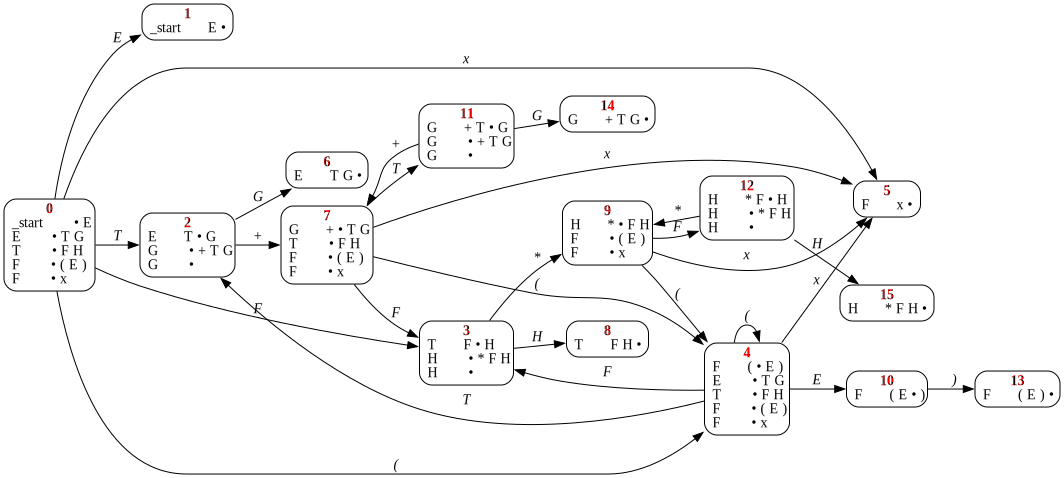

state 0
  _start  ↣   • E
   ---
  E  ↣   • T G
  T  ↣   • F H
  F  ↣   • ( E )
  F  ↣   • x
state 1
  _start  ↣  E • 
   ---

state 2
  E  ↣  T • G
   ---
  G  ↣   • + T G
  G  ↣   • 
state 3
  T  ↣  F • H
   ---
  H  ↣   • * F H
  H  ↣   • 
state 4
  F  ↣  ( • E )
   ---
  E  ↣   • T G
  T  ↣   • F H
  F  ↣   • ( E )
  F  ↣   • x
state 5
  F  ↣  x • 
   ---

state 6
  E  ↣  T G • 
   ---

state 7
  G  ↣  + • T G
   ---
  T  ↣   • F H
  F  ↣   • ( E )
  F  ↣   • x
state 8
  T  ↣  F H • 
   ---

state 9
  H  ↣  * • F H
   ---
  F  ↣   • ( E )
  F  ↣   • x
state 10
  F  ↣  ( E • )
   ---

state 11
  G  ↣  + T • G
   ---
  G  ↣   • + T G
  G  ↣   • 
state 12
  H  ↣  * F • H
   ---
  H  ↣   • * F H
  H  ↣   • 
state 13
  F  ↣  ( E ) • 
   ---

state 14
  G  ↣  + T G • 
   ---

state 15
  H  ↣  * F H • 
   ---



In [11]:
automaton_g3 = g3.lr0_automaton()
display(automaton_g3)
print(automaton_g3)

### Tables LR(0), SLR(1), LALR(1)

Ces tables sont obtenues à partir de l'automate LR(0) en invoquant sa méthode `table(mode d'analyse)`

Cette méthode est susceptible de produire une exception `grammar.common.ConflictError`

Par exemple la grammaire ci-dessus n'est pas LR(0) mais elle est SLR(1) :

In [12]:
from grammar.common import ConflictError

try : 
    table = automaton_g3.table('LR0')
    display(table)
except ConflictError as e :
    print(e)

conflict Reduce/Shift, state 2, letter +
 R : G → ε
 S : 7



In [13]:
try : 
    table = automaton_g3.table('SLR1')
    display(table)
except ConflictError as e :
    print(e)

{(1, '#'): (<Action.A: 'Accept'>, ''),
 (0, 'E'): (None, 1),
 (0, 'T'): (None, 2),
 (0, 'F'): (None, 3),
 (0, '('): (<Action.S: 'Shift'>, 4),
 (0, 'x'): (<Action.S: 'Shift'>, 5),
 (2, '#'): (<Action.R: 'Reduce'>, Rule(G → ε)),
 (2, ')'): (<Action.R: 'Reduce'>, Rule(G → ε)),
 (2, 'G'): (None, 6),
 (2, '+'): (<Action.S: 'Shift'>, 7),
 (3, '+'): (<Action.R: 'Reduce'>, Rule(H → ε)),
 (3, '#'): (<Action.R: 'Reduce'>, Rule(H → ε)),
 (3, ')'): (<Action.R: 'Reduce'>, Rule(H → ε)),
 (3, 'H'): (None, 8),
 (3, '*'): (<Action.S: 'Shift'>, 9),
 (4, 'E'): (None, 10),
 (4, 'T'): (None, 2),
 (4, 'F'): (None, 3),
 (4, '('): (<Action.S: 'Shift'>, 4),
 (4, 'x'): (<Action.S: 'Shift'>, 5),
 (5, '+'): (<Action.R: 'Reduce'>, Rule(F → x)),
 (5, '#'): (<Action.R: 'Reduce'>, Rule(F → x)),
 (5, '*'): (<Action.R: 'Reduce'>, Rule(F → x)),
 (5, ')'): (<Action.R: 'Reduce'>, Rule(F → x)),
 (6, '#'): (<Action.R: 'Reduce'>, Rule(E → T G)),
 (6, ')'): (<Action.R: 'Reduce'>, Rule(E → T G)),
 (7, 'T'): (None, 11),
 (7, 'F'): (None, 3),
 (7, '('): (<Action.S: 'Shift'>, 4),
 (7, 'x'): (<Action.S: 'Shift'>, 5),
 (8, '+'): (<Action.R: 'Reduce'>, Rule(T → F H)),
 (8, '#'): (<Action.R: 'Reduce'>, Rule(T → F H)),
 (8, ')'): (<Action.R: 'Reduce'>, Rule(T → F H)),
 (9, 'F'): (None, 12),
 (9, '('): (<Action.S: 'Shift'>, 4),
 (9, 'x'): (<Action.S: 'Shift'>, 5),
 (10, ')'): (<Action.S: 'Shift'>, 13),
 (11, '#'): (<Action.R: 'Reduce'>, Rule(G → ε)),
 (11, ')'): (<Action.R: 'Reduce'>, Rule(G → ε)),
 (11, 'G'): (None, 14),
 (11, '+'): (<Action.S: 'Shift'>, 7),
 (12, '+'): (<Action.R: 'Reduce'>, Rule(H → ε)),
 (12, '#'): (<Action.R: 'Reduce'>, Rule(H → ε)),
 (12, ')'): (<Action.R: 'Reduce'>, Rule(H → ε)),
 (12, 'H'): (None, 15),
 (12, '*'): (<Action.S: 'Shift'>, 9),
 (13, '+'): (<Action.R: 'Reduce'>, Rule(F → ( E ))),
 (13, '#'): (<Action.R: 'Reduce'>, Rule(F → ( E ))),
 (13, '*'): (<Action.R: 'Reduce'>, Rule(F → ( E ))),
 (13, ')'): (<Action.R: 'Reduce'>, Rule(F → ( E ))),
 (14, '#'): (<Action.R: 'Reduce'>, Rule(G → + T G)),
 (14, ')'): (<Action.R: 'Reduce'>, Rule(G → + T G)),
 (15, '+'): (<Action.R: 'Reduce'>, Rule(H → * F H)),
 (15, '#'): (<Action.R: 'Reduce'>, Rule(H → * F H)),
 (15, ')'): (<Action.R: 'Reduce'>, Rule(H → * F H))}

# Parsers (analyseurs syntaxique)

On peut obtenir des parsers descendants LL(1) ou ascendants LR(0) SLR(1) LALR(1) (sous réserve de compatibilité de la grammaire). Par exemple :

```python
g.ll1_table().parser() # parser LL(1)
g.lr0_automaton().table('SLR1').parser() # parser SLR(1)
```

Les parsers offrent la même interface qui comporte deux méthodes :

```python
parse( data : Iterable[Symbol] )
parse_tokens ( data : Iterable[Token] )
```
Chaque méthode renvoie `True` si la donnée analysée est correcte et déclenche une exception `ParseError`dans le cas contraire.

(NB : `Symbol` étend `str`. Un symbole est donc une chaîne)

## parse(data)
    
`parse(data)` attend une séquence (un Iterable quelconque) de symboles terminaux.

### alphabet terminal simple
Si chaque symbole terminal est constitué d'un seul caractère, on peut simplement passer le texte à analyser sous forme d'une chaîne, qui est un iterable de caractères.
    

In [14]:
g_anbn = Grammar.from_string('S->a S b |')
display(g_anbn)
parser_anbn = g_anbn.ll1_table().parser()
#parser_anbn = g_anbn.lr0_automaton().table('SLR1').parser()
mot = 'aaabbb'
print('mot : ', mot)
parser_anbn.parse(mot)

Grammar(
 terminals : a b
 variables : S
 axiom : S
 rules : ['S → a S b', 'S → ε']
)

mot :  aaabbb


True

Si au moins un symbole terminal est sur plusieurs caractères, on pourra alors partir d'une chaîne où les symboles sont séparés d'au moins un espace et les mettre sous forme de liste  avec split()


In [15]:
g_postfix = Grammar.from_string('S → S S + | S S * | S S − | S S / | NUMBER')
display(g_postfix)
parser_postfix = g_postfix.lr0_automaton().table('SLR1').parser()
mot = 'NUMBER NUMBER + NUMBER *'.split()
print('mot : ', mot)
parser_postfix.parse(mot)

Grammar(
 terminals : * + / NUMBER −
 variables : S
 axiom : S
 rules : ['S → S S +', 'S → S S *', 'S → S S −', 'S → S S /', 'S → NUMBER']
)

mot :  ['NUMBER', 'NUMBER', '+', 'NUMBER', '*']


True

##  parse_tokens(data)

`parse_tokens(data)` attend une séquence de Token's. Un **Token** est tout objet qui possède :
- un attribut `type` : un symbole terminal (chaîne)
- un attribut `value`: la valeur associée (en général le texte d'origine du token)

La tokenisation pourra être réalisée par tout tokenizer respectant la spécification ci-dessus, par exemple un lexer développé avec `sly.Lexer`.


In [16]:
from sly import Lexer
class ExpLexer (Lexer) :
    tokens = { NUMBER }
    literals = ('+','*','-','/') # un literal est un caractère traité comme un token
    NUMBER = '[0-9]+'
    ignore =' \t'
    
lexer = ExpLexer()
parser_postfix.parse_tokens(lexer.tokenize('23 451+6*'))


True

# Arbre de dérivation ( Abstract Syntax Tree - AST )

Les méthodes `parse()`et `parse_token()` disposent d'un paramètre optionnel : `semantic`

qui indique des calculs d'attributs synthétisés à réaliser lors de l'analyse. Quand `semantic`est défini, le parser renvoie la valeur calculée, au lieu de True.

La classe `grammar.semantic.GraphvizTree` définit les actions sémantiques construisant le dessin de l'arbre de dérivation pour le logiciel graphviz. Elle est compatible avec toute grammaire.

```python
from grammar.semantic import GraphvizTree
from graphviz import Source
dessiner_arbre = GraphvizTree()
source_dot = parser_postfix.parse_tokens(lexer.tokenize('23 451+6*'),semantic = dessiner_arbre)
display(Source(source_dot))
```


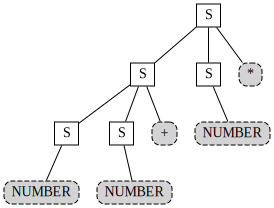

In [17]:
from grammar.semantic import GraphvizTree
from graphviz import Source
dessiner_arbre = GraphvizTree()
source_dot = parser_postfix.parse_tokens(lexer.tokenize('23 451+6 *'),semantic = dessiner_arbre)
display(Source(source_dot))

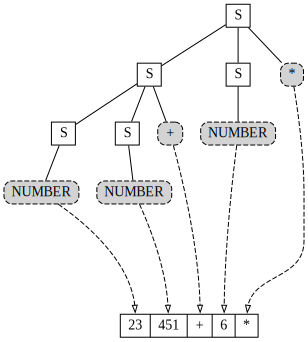

In [18]:
dessiner_arbre = GraphvizTree(with_word=True)
source_dot = parser_postfix.parse_tokens(lexer.tokenize('23 451+6*'),semantic = dessiner_arbre)
display(Source(source_dot))


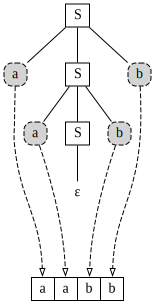

In [19]:
dessiner_arbre = GraphvizTree(with_word=True)
source_dot = parser_anbn.parse('aabb',semantic = dessiner_arbre)
display(Source(source_dot))


## Autres actions  sémantiques
Pour associer des actions sémantiques à une grammaire, on peut construire un dictionnaire de fonctions («callable» python), dont les clés sont les règles de la grammaire. **Toutes les règles de la grammaire doivent être présentes dans ce dictionnaire**.

Chaque fonction doit renvoyer la valeur de l'attribut synthétisé pour la variable de gauche de la règle correspondante. 

La fonction doit posséder 3 paramètres. Seul le premier paramètre, nommé `p` est utile dans notre exemple. Il contient les valeurs des attributs associés aux symboles de la partie droite. Le nommage est identique à celui utilisé dans le parser du module sly.

À partir du dictionnaire, on construit une instance de la classe `DictSemantic`



In [20]:
postfix_dict = {
    'S-> S S +' : lambda p,run,ns : p.S0 + p.S1,
    'S-> S S -' : lambda p,run,ns : p.S0 - p.S1,
    'S-> S S *' : lambda p,run,ns : p.S0 * p.S1,
    'S-> S S /' : lambda p,run,ns : p.S0 / p.S1,
    'S-> NUMBER' : lambda p,run,ns : int(p.NUMBER)
}
from grammar.semantic import DictSemantic
evaluer_postfix = DictSemantic(postfix_dict)
parser_postfix.parse_tokens(lexer.tokenize('23 451 + 6 *'),semantic = evaluer_postfix)


2844